# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        
        #convert Kelvin to Celsius
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
DAY_OF_DATA_COLLECTION = datetime.date.today().strftime('%Y-%m-%d')
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | lachi
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | vernon
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | lagos
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | okakarara
Processing Record 9 of Set 1 | salekhard
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | el galpon
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | bikenibeu village
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | claveria
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | selfoss
Processing Record 19 of Set 1 | enewetak
Processing Record 20 of Set 1 | bereznik
Processing Record 21 of Set 1 | lamu
Processing Record 22 of Set 1 | chibougamau


Processing Record 37 of Set 4 | newman
Processing Record 38 of Set 4 | afaahiti
Processing Record 39 of Set 4 | xilin hot
Processing Record 40 of Set 4 | fort mcmurray
Processing Record 41 of Set 4 | mumbai
Processing Record 42 of Set 4 | yagry
City not found. Skipping...
Processing Record 43 of Set 4 | salalah
Processing Record 44 of Set 4 | mutsu
Processing Record 45 of Set 4 | kavieng
Processing Record 46 of Set 4 | mili
Processing Record 47 of Set 4 | kirensk
Processing Record 48 of Set 4 | villavicencio
Processing Record 49 of Set 4 | qaqortoq
Processing Record 0 of Set 5 | villanueva
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | yinchuan
Processing Record 3 of Set 5 | hayma'
City not found. Skipping...
Processing Record 4 of Set 5 | queenstown
Processing Record 5 of Set 5 | ust-nera
Processing Record 6 of Set 5 | igrim
Processing Record 7 of Set 5 | tiksi
Processing Record 8 of Set 5 | hasaki
Processing Record 9 of Set 5 | yaren
Processing Record 10 of S

Processing Record 29 of Set 8 | pingyin
Processing Record 30 of Set 8 | zaqatala
Processing Record 31 of Set 8 | chegdomyn
Processing Record 32 of Set 8 | crane
Processing Record 33 of Set 8 | glenfield park
Processing Record 34 of Set 8 | siwa oasis
Processing Record 35 of Set 8 | callaway
Processing Record 36 of Set 8 | santo amaro da imperatriz
Processing Record 37 of Set 8 | kudat
Processing Record 38 of Set 8 | al hufuf
Processing Record 39 of Set 8 | ishinomaki
Processing Record 40 of Set 8 | millau
Processing Record 41 of Set 8 | pointe-noire
Processing Record 42 of Set 8 | slavgorod
Processing Record 43 of Set 8 | okola
Processing Record 44 of Set 8 | broken hill
Processing Record 45 of Set 8 | luzino
Processing Record 46 of Set 8 | polyarnyy
Processing Record 47 of Set 8 | pariang
City not found. Skipping...
Processing Record 48 of Set 8 | shetpe
Processing Record 49 of Set 8 | ahau
City not found. Skipping...
Processing Record 0 of Set 9 | valdosta
Processing Record 1 of Set 

Processing Record 17 of Set 12 | clovis
Processing Record 18 of Set 12 | lilongwe
Processing Record 19 of Set 12 | ocos
Processing Record 20 of Set 12 | puerto cabezas
Processing Record 21 of Set 12 | richlands
Processing Record 22 of Set 12 | antofagasta
Processing Record 23 of Set 12 | woodmoor
Processing Record 24 of Set 12 | mahenge
Processing Record 25 of Set 12 | cuito
Processing Record 26 of Set 12 | ewo
Processing Record 27 of Set 12 | wenatchee
Processing Record 28 of Set 12 | noshiro
Processing Record 29 of Set 12 | cabedelo
Processing Record 30 of Set 12 | novodvinsk
Processing Record 31 of Set 12 | sechura
Processing Record 32 of Set 12 | kurchatov
Processing Record 33 of Set 12 | katsuura
Processing Record 34 of Set 12 | villa rica
Processing Record 35 of Set 12 | buckie
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,19.98,69,53,3.57,PN,1690237058
1,lachi,33.3833,71.3386,31.75,61,100,0.34,PK,1690237059
2,port-aux-francais,-49.3500,70.2167,3.96,72,100,11.16,TF,1690237059
3,vernon,50.2581,-119.2691,27.56,36,81,2.06,CA,1690237059
4,yellowknife,62.4560,-114.3525,26.29,34,100,4.63,CA,1690236901


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.98,69,53,3.57,PN,1690237058
1,lachi,33.3833,71.3386,31.75,61,100,0.34,PK,1690237059
2,port-aux-francais,-49.3500,70.2167,3.96,72,100,11.16,TF,1690237059
3,vernon,50.2581,-119.2691,27.56,36,81,2.06,CA,1690237059
4,yellowknife,62.4560,-114.3525,26.29,34,100,4.63,CA,1690236901


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

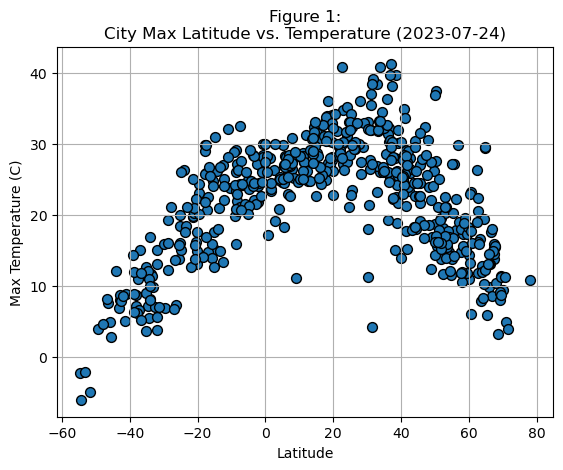

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Max Temp',
                  xlabel='Latitude', 
                  ylabel='Max Temperature (C)',
                  title=f"Figure 1:\nCity Max Latitude vs. Temperature ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

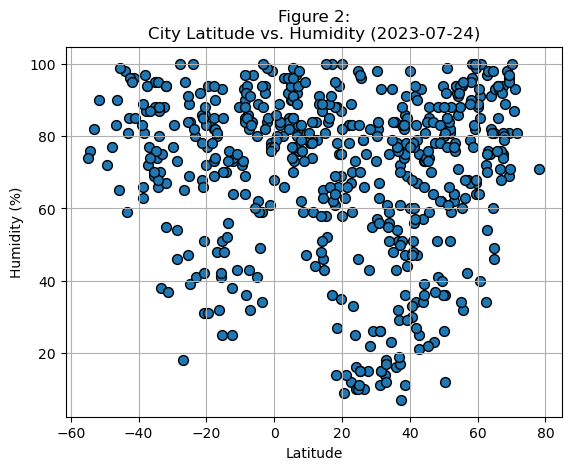

In [11]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Humidity',
                  xlabel='Latitude', 
                  ylabel='Humidity (%)',
                  title=f"Figure 2:\nCity Latitude vs. Humidity ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

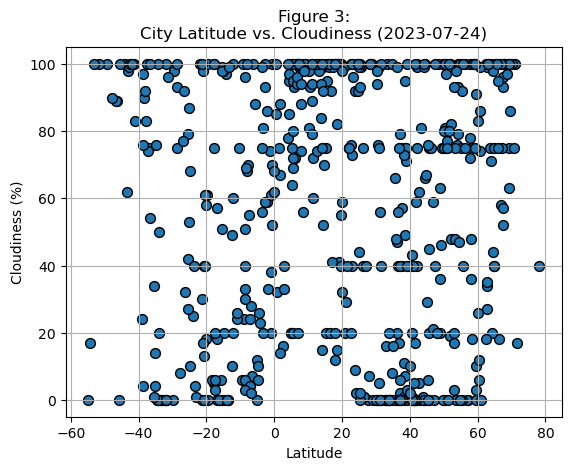

In [12]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Cloudiness',
                  xlabel='Latitude', 
                  ylabel='Cloudiness (%)',
                  title=f"Figure 3:\nCity Latitude vs. Cloudiness ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

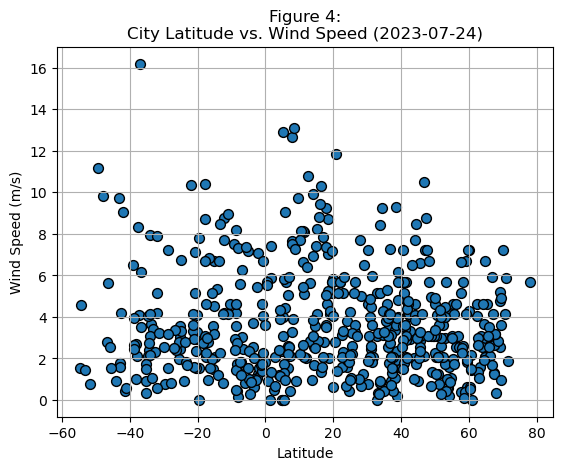

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', 
                  x='Lat', 
                  y='Wind Speed',
                  xlabel='Latitude', 
                  ylabel='Wind Speed (m/s)',
                  title=f"Figure 4:\nCity Latitude vs. Wind Speed ({DAY_OF_DATA_COLLECTION})",
                  edgecolors='black',
                  s=50
                 )

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linearRegression(df, x, y, xAnno, yAnno, xlabel, ylabel, figureNumber, title):#, xlabel, ylabel, title):
    (m, yIntercept, r, p, std) = linregress(df[x], df[y])
    linStr = f'y = {m:.2f}x + {yIntercept:.2f}'
    yLineValues = m * df[x] + yIntercept
    
    print(f'The r-value is: {r}')
    
    title = title.replace("Figure:", f"Figure {figureNumber}:")
    
    df.plot(kind='scatter', 
              x= x, 
              y= y,
              xlabel=xlabel,
              ylabel=ylabel,
              title= title,
              s=50
             )

    # Incorporate the other graph properties
    plt.plot(df[x], yLineValues, color='red')
    plt.annotate(linStr, (xAnno, yAnno), color = 'red', fontsize=14)

    # Save the figure
    plt.savefig(f"output_data/Fig{figureNumber}.png")

    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,lachi,33.3833,71.3386,31.75,61,100,0.34,PK,1690237059
3,vernon,50.2581,-119.2691,27.56,36,81,2.06,CA,1690237059
4,yellowknife,62.4560,-114.3525,26.29,34,100,4.63,CA,1690236901
5,lagos,6.5833,3.7500,26.18,92,100,2.62,NG,1690236303
8,salekhard,66.5300,66.6019,17.65,71,100,2.76,RU,1690237059


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,19.98,69,53,3.57,PN,1690237058
2,port-aux-francais,-49.3500,70.2167,3.96,72,100,11.16,TF,1690237059
6,blackmans bay,-43.0167,147.3167,8.07,81,98,1.77,AU,1690237059
7,okakarara,-20.5833,17.4333,16.13,31,13,2.35,NaN,1690237059
10,el galpon,-25.3807,-64.6526,13.81,47,42,1.97,AR,1690237060


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5987628575301699


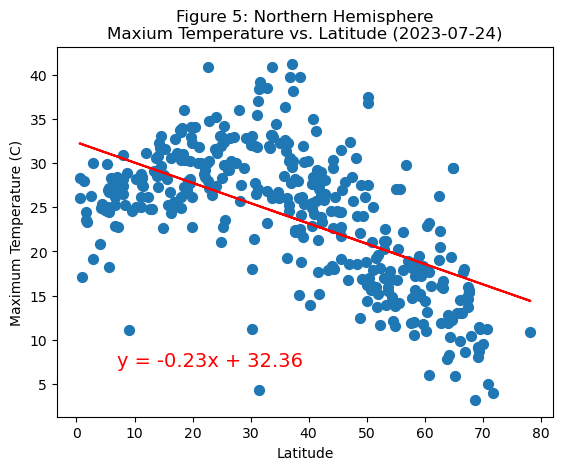

In [17]:
# Linear regression on Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Max Temp', 7, 7,  'Latitude', 'Maximum Temperature (C)', 5, f"Figure: Northern Hemisphere\nMaxium Temperature vs. Latitude ({DAY_OF_DATA_COLLECTION})")



The r-value is: 0.8559904629769819


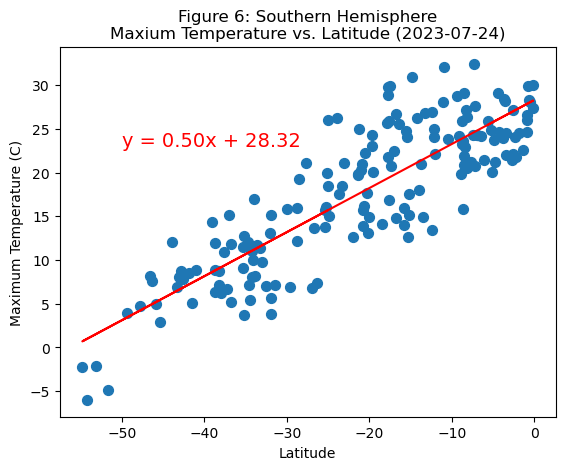

In [18]:
# Linear regression on Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Max Temp', -50, 23, 'Latitude', 'Maximum Temperature (C)', 6, f"Figure: Southern Hemisphere\nMaxium Temperature vs. Latitude ({DAY_OF_DATA_COLLECTION})")

**Discussion about the linear relationship:** 

### Pearson's R Coefficient:
In the northern hemisphere, Pearson's R coefficient is -0.60 which shows that there is a negative correlation between maximum temperature and latitude. And in the southern hemisphere, Pearson's R coefficient is 0.85 which shows that there is a positive correlation between maximum temperature and latitude. This corresponds quite well with our basic intuition that the further one gets from the equator, the cooler the maximum temperature is (i.e. roughly, the higher the absolute value of latitude the cooler the climate). <br>However, also notice that Pearson's R coefficient is 40% higher in the southern hemisphere, which is perhaps in large part due to the fact that the day of data collection was on July 24, 2023 (weeks after the summer solstice) which is summertime in the northern hemisphere and the sun is closest to the earth at a latitude of approximately 22&#176;N in latitude. The graph roughly shows this in that there is an upward trend in the data between 0&#176; latitude and 22&#176;N latitude, which is a positive correlation between those latitudes which in turn will dramatically reduce the magnitude of the overall net negative R correlation of the northern hemisphere.

### Celsius To Latitude Rate Of Change (Line Slope):
Similarly (but not too surprisingly), the northern hemisphere has a -0.23&#176;C/&#176;Lat rate of change (see Figure 5) whereas the southern hemisphere has a 0.50&#176;C/&#176;Lat rate of change (see Figure 6) which is approximately 115% higher in absolute value. This is likely due to the fact that the latitude that is closest to the sun today (July 24, 2023) is approximately 22&#176; North of the equator as already mentioned. And so, similar to the conversation about Pearson's R coefficient magnitude discrepency between northern and southern hemispheres, the slope of the linear regression line is suppressed (reduced) significantly by the upward trend in data between 0&#176; and 22&#176;N latitude eventhough the overall slope is still negative.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.044804431537201726


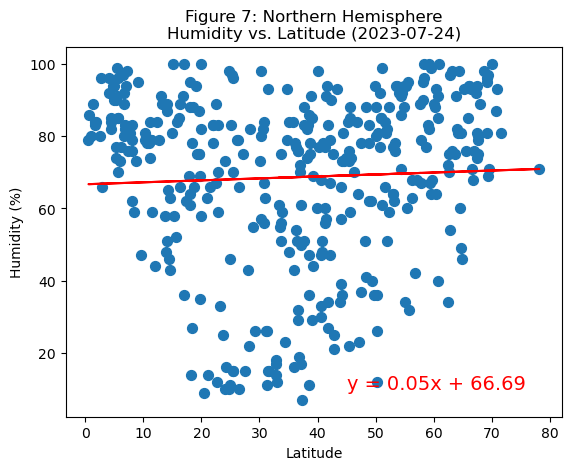

In [19]:
# Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Humidity', 45, 10,  'Latitude', 'Humidity (%)', 7, f"Figure: Northern Hemisphere\nHumidity vs. Latitude ({DAY_OF_DATA_COLLECTION})")


The r-value is: -0.11558626176322744


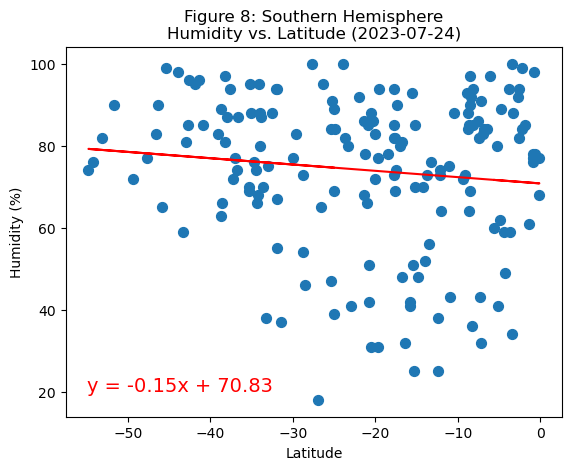

In [20]:
# Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Humidity', -55, 20,  'Latitude', 'Humidity (%)', 8, f"Figure: Southern Hemisphere\nHumidity vs. Latitude ({DAY_OF_DATA_COLLECTION})")


**Discussion about the linear relationship:**


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.10904731953286424


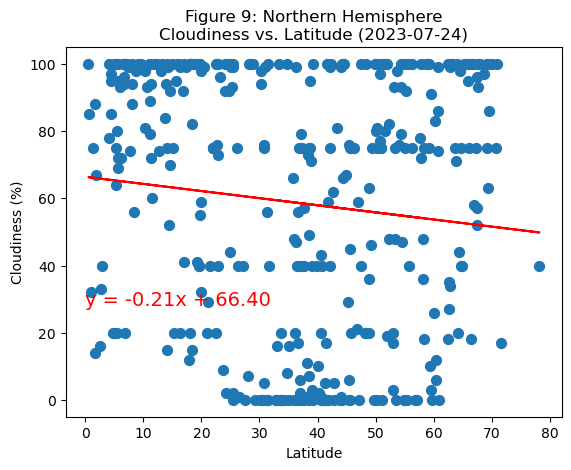

In [21]:
# Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Cloudiness', 0, 28,  'Latitude', 'Cloudiness (%)', 9, f"Figure: Northern Hemisphere\nCloudiness vs. Latitude ({DAY_OF_DATA_COLLECTION})")


The r-value is: -0.13239107391975713


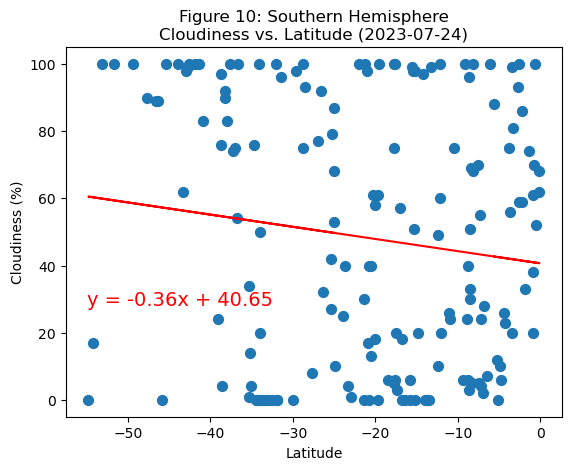

In [22]:
# Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Cloudiness', -55, 28,  'Latitude', 'Cloudiness (%)', 10, f"Figure: Southern Hemisphere\nCloudiness vs. Latitude ({DAY_OF_DATA_COLLECTION})")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1951845553825647


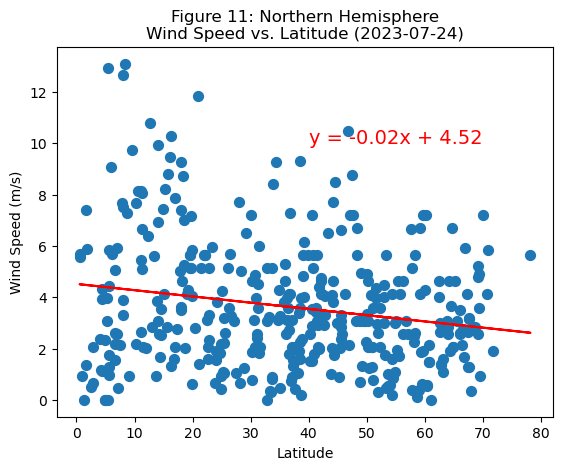

In [23]:
# Northern Hemisphere
linregdata = linearRegression(northern_hemi_df, 'Lat', 'Wind Speed', 40, 10,  'Latitude', 'Wind Speed (m/s)', 11, f"Figure: Northern Hemisphere\nWind Speed vs. Latitude ({DAY_OF_DATA_COLLECTION})")


The r-value is: -0.07860288738355042


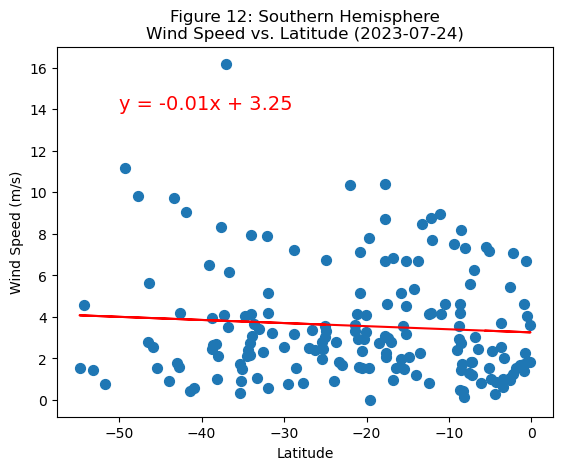

In [24]:
# Southern Hemisphere
linregdata = linearRegression(southern_hemi_df, 'Lat', 'Wind Speed', -50, 14,  'Latitude', 'Wind Speed (m/s)', 12, f"Figure: Southern Hemisphere\nWind Speed vs. Latitude ({DAY_OF_DATA_COLLECTION})")


**Discussion about the linear relationship:** YOUR RESPONSE HERE